In [9]:
library(repr)
library(tidyverse)
library(tidymodels)
library(readxl)

In [5]:
set.seed(9999) # set a seed to be consistent

heart_data <- read_excel("data/heart_disease.xlsx") |>
                        mutate(age = as.integer(age), ca = as.integer(ca), thal = as.integer(thal), num = as.factor(num)) |>
                        na.omit() # Omit any missing values
                    

# # Split data (training 70% test 30%)
# heart_split <- initial_split(heart_data, prop = 0.70, strata = num)  
# heart_train <- training(heart_split)   
# heart_test <- testing(heart_split)

# # Cross-Validation
# heart_vfold <- vfold_cv(heart_train, v = 5, strata = num)
# heart_train
# heart_data
heart_data

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `ca = as.integer(ca)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
63,1,4,130,254,0,2,147,0,1.4,2,1,7,2


In [6]:
# KNN Steps
k_vals <- tibble(neighbors = c(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)) # K-Values you want to test out

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

heart_recipe <- recipe(num ~ . , data = heart_train) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())


heart_fit <- workflow() |>
                     add_recipe(heart_recipe) |>
                     add_model(knn_spec) |>
                     tune_grid(resamples = heart_vfold, grid = k_vals)

heart_results <- collect_metrics(heart_fit)

accuracies <- heart_results |>
              filter(.metric == "accuracy")
accuracies

ERROR: Error in eval(expr, envir, enclos): object 'heart_train' not found


In [ ]:
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors (k)", y = "Accuracy Estimate") +
       theme(text = element_text(size = 20)) 
       # scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       # scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
cross_val_plot
# K = 10 is the best K - value

In [ ]:
# Build model specifications with the best k value
knn_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |>
                  set_engine("kknn") |>
                  set_mode("classification")

final_fit <- workflow() |>
            add_recipe(heart_recipe) |>
            add_model(knn_spec_final) |>
            fit(data = heart_test)
final_fit

In [ ]:
heart_predictions <- predict(final_fit, heart_test) |>
                     bind_cols(heart_test)

heart_metrics <- heart_predictions |>
                 metrics(truth = num, estimate = .pred_class)

heart_conf_mat <- heart_predictions |>
                 conf_mat(truth = num, estimate = .pred_class)

heart_metrics
heart_conf_mat

# Methods
### 1. Understanding the dataset
#### By exploring the dataset, we were able to detect missing values & inconsistent data type. 
ca (Number of major vessels from 0 to 3) and thal (Maximum heart rate achieved) were in character type, and num (diagnosis of heart disease from 0 to 4) was in double. 
Drawing a histogram to see if a variable resembles normal distribution.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


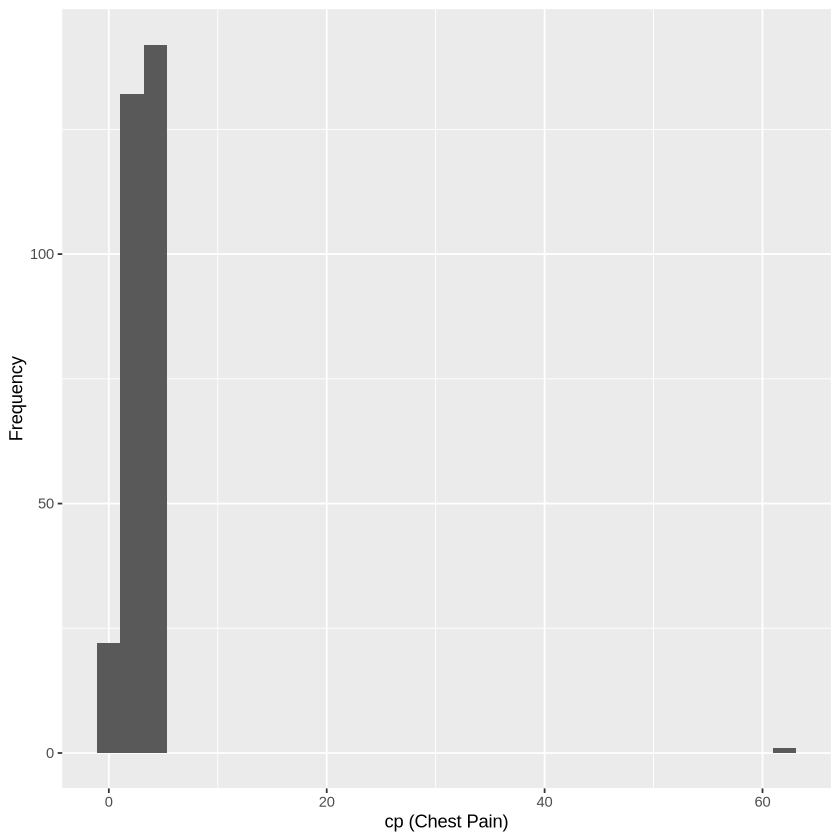

In [79]:
cp_plot <- heart_data |>  #cp = chest pain
    ggplot(aes(x = cp)) +
      geom_histogram() +
      xlab("cp (Chest Pain)") +
      ylab("Frequency") 

cp_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


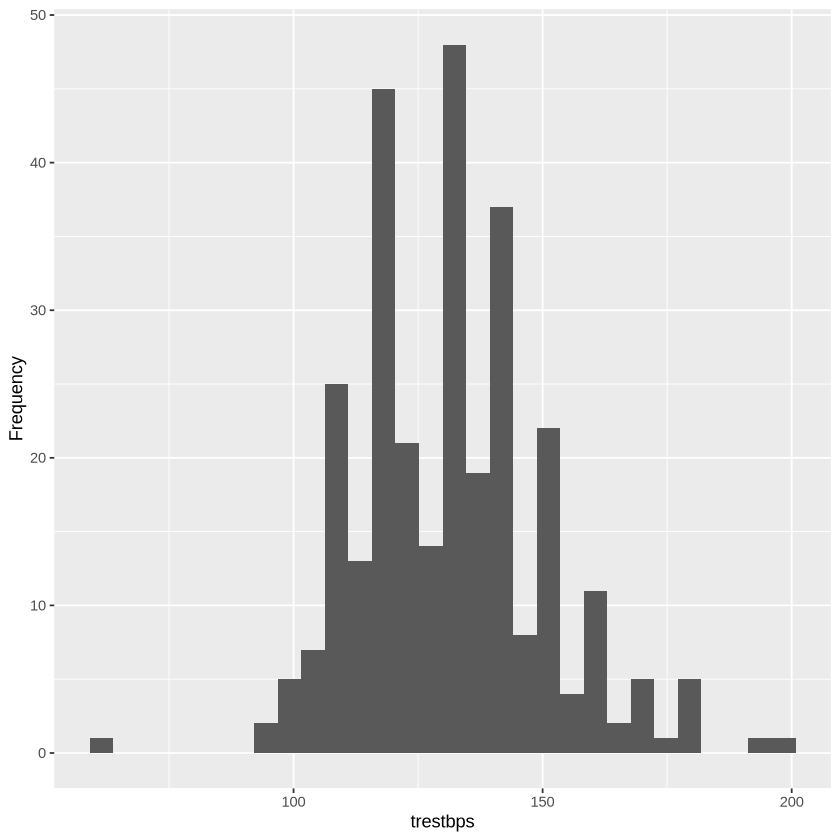

In [80]:
trestbps_plot <- heart_data |>  
    ggplot(aes(x = trestbps)) +
      geom_histogram() +
      xlab("trestbps") +
      ylab("Frequency") 

trestbps_plot  # Normal Distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


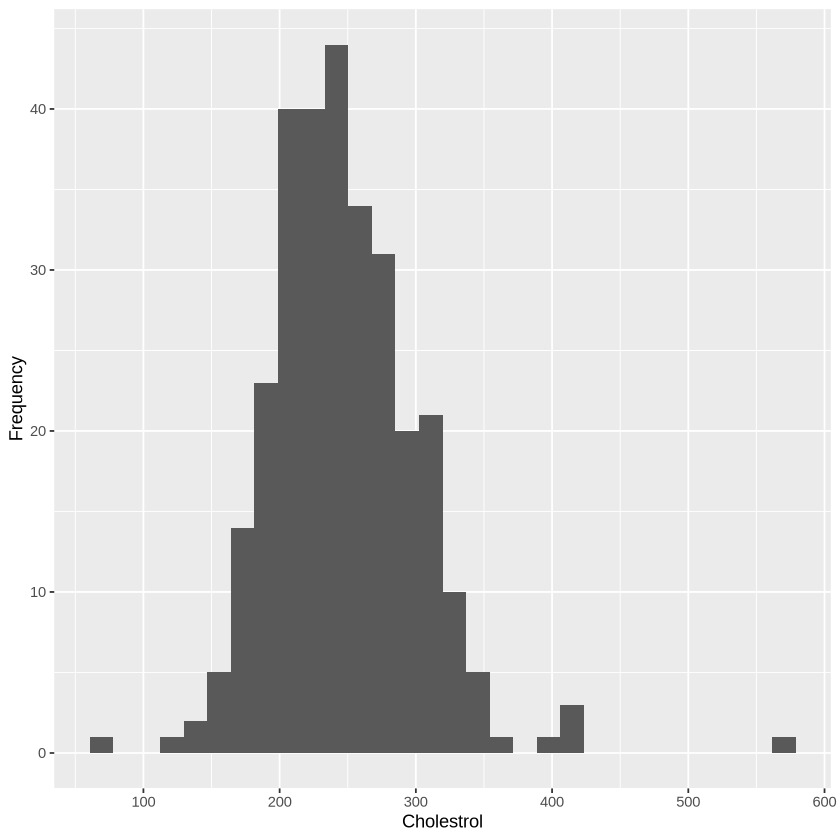

In [81]:
chol_plot <- heart_data |>  
    ggplot(aes(x = chol)) +
      geom_histogram() +
      xlab("Cholestrol") +
      ylab("Frequency") 

chol_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


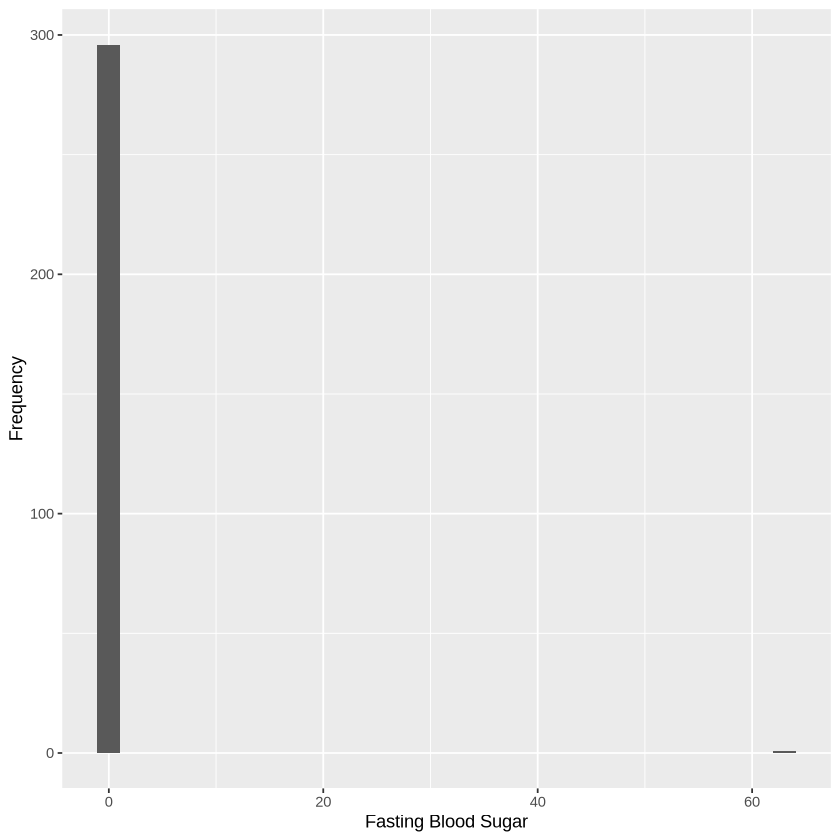

In [82]:
fbs_plot <- heart_data |>  
    ggplot(aes(x = fbs)) +
      geom_histogram() +
      xlab("Fasting Blood Sugar") +
      ylab("Frequency") 

fbs_plot